In [2]:
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self,X,y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [45]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
df.tail()
# df.head()
# print('维度',df.ndim)
# print('shape:', df.shape)
# print('size:', df.size)
# np.diff(df[1])
# df.count()
# df[1].idxmin()
# df[1].quantile(0.25)
# df[2].mode()
# df[3].var()            #方差
# df[3].std()            #标准差
# df[3].mad()            #平均绝对偏差
# df[3].skew()           #偏度
# df[3].kurt()           #峰度
# df.describe()       #一次性输出多个描述性统计指标
# def status(x) : 
#     return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),
#                       x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),
#                       x.std(),x.skew(),x.kurt()],index=['总数','最小值','最小值位置','25%分位数',
#                     '中位数','75%分位数','均值','最大值','最大值位数','平均绝对偏差','方差','标准差','偏度','峰度'])
# # 执行该函数，查看一下d1数据集的这些统计函数值：
# ha = pd.DataFrame(status(df[2]))
# ha

,0
总数,150.000000
最小值,1.000000
最小值位置,22.000000
25%分位数,1.600000
中位数,4.350000
75%分位数,5.100000
均值,3.758667
最大值,6.900000
最大值位数,118.000000
平均绝对偏差,1.561920


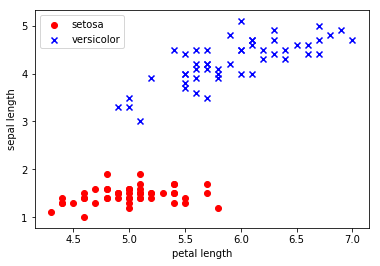

In [62]:
import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values
plt.scatter(X[:50,0],X[:50,1], color = 'red', marker='o',label = 'setosa')
plt.scatter(X[50:100,0],X[50:100,1], color = 'blue', marker='x',label = 'versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()


In [74]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1,max_iter=10)
ppn.fit(X,y)
plt.plot(range(1,np.len(ppn.loss_function_)+1),loss_function_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of missclassifications')
plt.show()



AttributeError: module 'numpy' has no attribute 'len'

In [11]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:,0].min() -1,X[:,0].max()+1
    x2_min, x2_max = X[:,1].min() -1,X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx],label=cl)

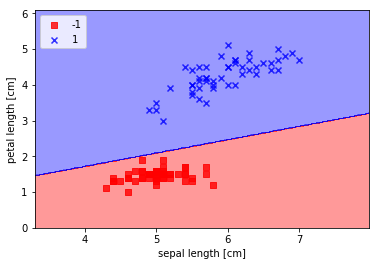

In [12]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


In [8]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:,0].min() -1,X[:,0].max()+1
    x2_min, x2_max = X[:,1].min() -1,X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx],label=cl)

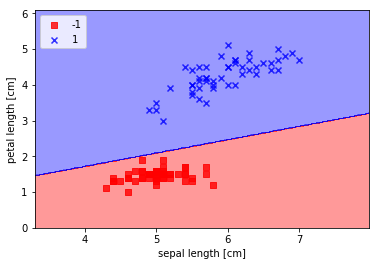

In [9]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()